In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = '/content/drive/My Drive/Datasets/Mobile_App_Data.csv'
df = pd.read_csv(file_path)
display(df)

,User_ID,Group,Session_Length,Interactions,Feature_Enabled,Used_Feature
0,1,A,8.75,7,0,0.0
1,2,A,14.51,8,0,0.0
2,3,A,12.32,3,0,0.0
3,4,A,10.99,1,0,0.0
4,5,A,6.56,4,0,0.0
5,6,A,6.56,2,0,0.0
6,7,A,5.58,8,0,0.0
7,8,A,13.66,4,0,0.0
8,9,A,11.01,2,0,0.0
9,10,A,12.08,6,0,0.0


In [ ]:
print(df.isnull().sum())  # Identify missing values

User_ID            0
Group              0
Session_Length     0
Interactions       0
Feature_Enabled    0
Used_Feature       0
dtype: int64


**Exploratory Data Analysis (EDA)**

<ipython-input-7-a5c5a78ab2a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Session_Length', data=avg_session_length, palette='viridis')


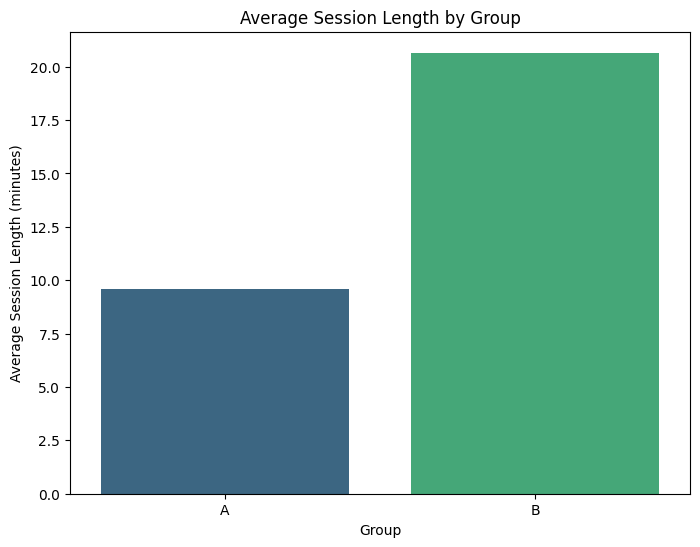

In [ ]:
# Calculate average session length by group
avg_session_length = df.groupby('Group')['Session_Length'].mean().reset_index()

# Plot bar chart for average session length
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Session_Length', data=avg_session_length, palette='viridis')
plt.title('Average Session Length by Group')
plt.xlabel('Group')
plt.ylabel('Average Session Length (minutes)')
plt.ylim(0, avg_session_length['Session_Length'].max() + 1)  # Adding some space above the highest bar
plt.show()

<ipython-input-8-c81d075905ee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Interactions', data=avg_interactions, palette='coolwarm')


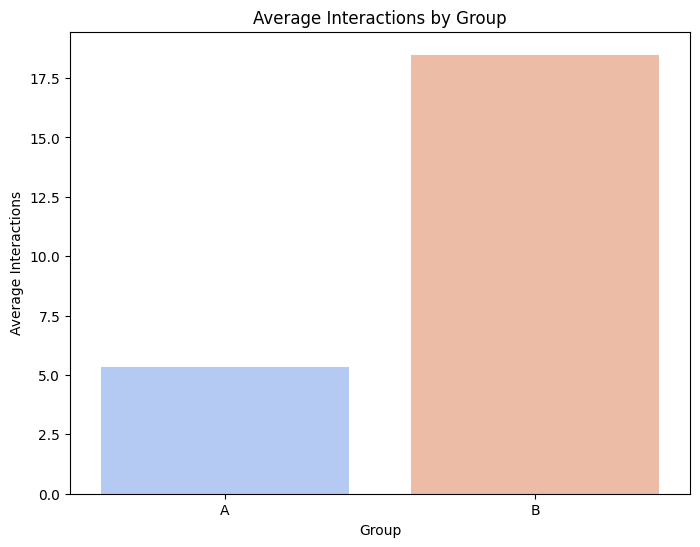

In [ ]:
# Calculate average interactions by group
avg_interactions = df.groupby('Group')['Interactions'].mean().reset_index()

# Plot bar chart for average interactions
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Interactions', data=avg_interactions, palette='coolwarm')
plt.title('Average Interactions by Group')
plt.xlabel('Group')
plt.ylabel('Average Interactions')
plt.ylim(0, avg_interactions['Interactions'].max() + 1)  # Adding some space above the highest bar
plt.show()


In [ ]:
# Count number of users in each group
group_counts = df['Group'].value_counts()
print(group_counts)

Group
A    20
B    20
Name: count, dtype: int64


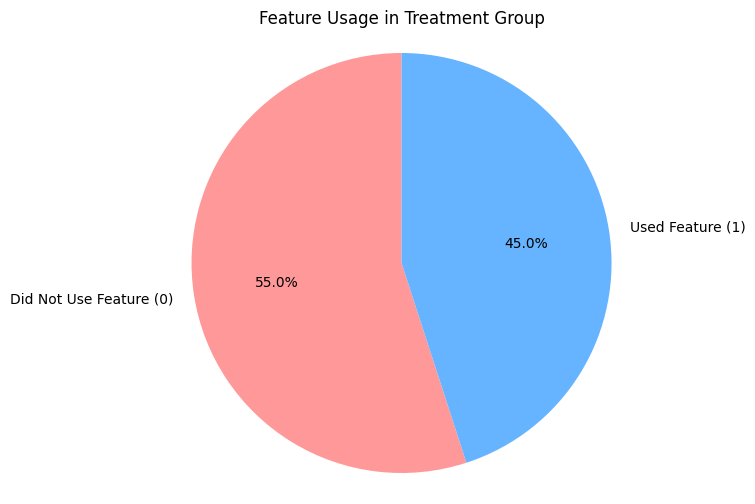

In [ ]:
# Calculate feature usage
feature_usage_counts = df[df['Group'] == 'B']['Used_Feature'].value_counts()

# Plot pie chart for feature usage
plt.figure(figsize=(8, 6))
plt.pie(feature_usage_counts, labels=['Did Not Use Feature (0)', 'Used Feature (1)'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Feature Usage in Treatment Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


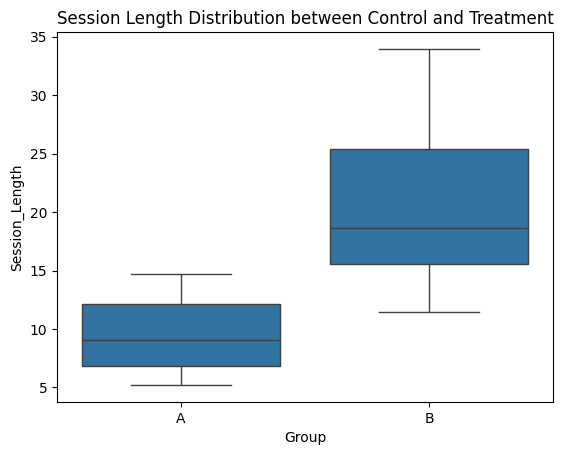

In [ ]:
# Compare session length between groups
sns.boxplot(x='Group', y='Session_Length', data=df)
plt.title('Session Length Distribution between Control and Treatment')
plt.show()


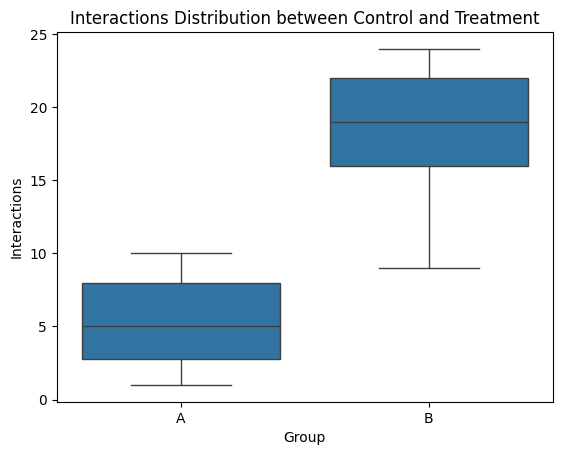

In [ ]:
# Compare number of interactions between groups
sns.boxplot(x='Group', y='Interactions', data=df)
plt.title('Interactions Distribution between Control and Treatment')
plt.show()

**A/B Test - Two Sample T-Test for Session Length and Interactions**

In [ ]:
control_group = df[df['Group'] == 'A']
treatment_group = df[df['Group'] == 'B']

# T-Test for Session Length
t_stat, p_val = stats.ttest_ind(control_group['Session_Length'], treatment_group['Session_Length'])
print(f'Session Length T-Test: t-statistic = {t_stat}, p-value = {p_val}')

# T-Test for Interactions
t_stat, p_val = stats.ttest_ind(control_group['Interactions'], treatment_group['Interactions'])
print(f'Interactions T-Test: t-statistic = {t_stat}, p-value = {p_val}')

Session Length T-Test: t-statistic = -6.823687056676668, p-value = 4.263660388654717e-08
Interactions T-Test: t-statistic = -11.09762669334035, p-value = 1.7475633372523214e-13


**Chi-Square Test for Feature Usage**

In [ ]:
used_feature = df[df['Group'] == 'B']['Used_Feature']
chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(df['Group'], df['Used_Feature']))
print(f'Chi-Square Test: chi2-statistic = {chi2_stat}, p-value = {p_val}')

Chi-Square Test: chi2-statistic = 12.539184952978058, p-value = 0.00039850608653802644
